# Анализ данных по датасету members

In [130]:
import numpy as np
import pandas as pd

In [131]:
# при загрузке файла выберем только необходимые для работы столбцы и зададим типы данных при чтении файла
members_1 = pd.read_csv(r'members_1.csv',
                       usecols=['name',
                                'birthday',                                
                                'sex',
                                'profession',
                                'salary_usd$',
                                'group_id',
                                'entry_date',
                                'city_name',
                                'state_name',
                                'age'                    
                               ],
                       dtype={
                               'name':'str',
                               'birthday':'datetime64[ns]',
                               'sex':'category',
                               'profession': 'str',
                               'salary_usd$':'int64',
                               'group_id':'str',
                               'entry_date': 'datetime64[ns]',
                               'city_name': 'str',
                               'state_name': 'str',
                               'age': 'int64'
                              }, engine='python')
members_1

,name,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61
3,Toni Baxter,1992-03-21,F,Emergency planning/management officer,3818,2017-07-18,1291778,Florence,Kentucky,31
4,Shaun Zuniga,1999-07-04,N,"Runner, broadcasting/film/video",4962,2017-11-18,26053931,Nickerson,Kansas,24
...,...,...,...,...,...,...,...,...,...,...
130984,George Mcdaniel,1943-03-14,M,Comptroller,2393,2018-04-14,1222759,Oakhurst,California,80
130985,Kevin Diaz DVM,1999-05-16,F,Customer service manager,4874,2018-12-27,2137821,Spring Lake Park,Minnesota,24
130986,Latasha Alvarez MD,1953-07-07,N,Interpreter,2579,2018-09-20,23343110,Newton County,Missouri,70
130987,Hector Davidson,1945-05-05,N,Lexicographer,2890,2018-11-18,10982362,Houston,Alaska,78


In [132]:
members_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130989 entries, 0 to 130988
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   name         130989 non-null  object        
 1   birthday     130989 non-null  datetime64[ns]
 2   sex          130989 non-null  category      
 3   profession   130989 non-null  object        
 4   salary_usd$  130989 non-null  int64         
 5   entry_date   130989 non-null  datetime64[ns]
 6   group_id     130989 non-null  object        
 7   city_name    130989 non-null  object        
 8   state_name   130989 non-null  object        
 9   age          130989 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(2), object(5)
memory usage: 9.1+ MB


In [134]:
# скачаем таблицу 
hobby_list_1 = pd.read_csv('hobby_list_1.csv', dtype={'group_id':'str', 'category_id':'str'})

In [135]:
hobby_list_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   group_id          8035 non-null   object
 1   name              8034 non-null   object
 2   category_id       8035 non-null   object
 3   monthly_fee_USD$  8035 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 251.2+ KB


In [136]:
# созданим левое соединение members_1 и hobby_list_1 по набору groups_id в новый фрейм
members_11 = members_1.merge(hobby_list_1, how = 'left', on = 'group_id')
members_11.head(3)

,name_x,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,name_y,category_id,monthly_fee_USD$
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19


In [137]:
# также проведем слияние в новый фрейм данных из members_11 и categories
members_12 = members_11.merge(pd.read_csv('categories_1.csv', dtype = {'category_id':'str'}), how = 'left', on = 'category_id')
members_12

,name_x,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,name_y,category_id,monthly_fee_USD$,category_name
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7,Education & Learning
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18,Fitness
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19,Parents & Family
3,Toni Baxter,1992-03-21,F,Emergency planning/management officer,3818,2017-07-18,1291778,Florence,Kentucky,31,San Francisco Dodgeball Meetup Group,32,1,Sports & Recreation
4,Shaun Zuniga,1999-07-04,N,"Runner, broadcasting/film/video",4962,2017-11-18,26053931,Nickerson,Kansas,24,Passionate Concert Goers,21,9,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130984,George Mcdaniel,1943-03-14,M,Comptroller,2393,2018-04-14,1222759,Oakhurst,California,80,RHYTHMflow Explorations,21,21,Music
130985,Kevin Diaz DVM,1999-05-16,F,Customer service manager,4874,2018-12-27,2137821,Spring Lake Park,Minnesota,24,Aquatic Voyagers Scuba Club,23,18,Outdoors & Adventure
130986,Latasha Alvarez MD,1953-07-07,N,Interpreter,2579,2018-09-20,23343110,Newton County,Missouri,70,Chicago Womens Soccer Meet up,32,5,Sports & Recreation
130987,Hector Davidson,1945-05-05,N,Lexicographer,2890,2018-11-18,10982362,Houston,Alaska,78,Chicago Indonesian (Bahasa Indonesia) Language...,16,23,Language & Ethnic Identity


In [138]:
members_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130989 entries, 0 to 130988
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name_x            130989 non-null  object        
 1   birthday          130989 non-null  datetime64[ns]
 2   sex               130989 non-null  category      
 3   profession        130989 non-null  object        
 4   salary_usd$       130989 non-null  int64         
 5   entry_date        130989 non-null  datetime64[ns]
 6   group_id          130989 non-null  object        
 7   city_name         130989 non-null  object        
 8   state_name        130989 non-null  object        
 9   age               130989 non-null  int64         
 10  name_y            130974 non-null  object        
 11  category_id       130989 non-null  object        
 12  monthly_fee_USD$  130989 non-null  int64         
 13  category_name     130989 non-null  object        
dtypes: c

In [139]:
members_12 = members_12.rename(columns = {'name_x':'member_name', 'name_y':'fun_club_name'})
members_12.head(3)

,member_name,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,fun_club_name,category_id,monthly_fee_USD$,category_name
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7,Education & Learning
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18,Fitness
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19,Parents & Family


In [140]:
# функция вывода и подсчета категориальных значений
cat_features = [f for f in members_12.columns if(members_12[f].dtype=='O')]
members_12[cat_features].describe()

,member_name,profession,group_id,city_name,state_name,fun_club_name,category_id,category_name
count,130989,130989,130989,130989,130989,130974,130989,130989
unique,130989,639,8035,8580,52,8034,26,26
top,Vanessa Casey,English as a second language teacher,14213992,Washington County,Texas,Yo-Yo Dieters No More The NYC Weight Loss Group,14,Health & Wellbeing
freq,1,276,31,203,8539,31,14174,14174


In [141]:
# топ-5 самых "возрастных" клубов (по среднему возрасту членов)
(members_12.groupby('fun_club_name')['age'].mean().sort_values(ascending=False).head(5)).round()

fun_club_name
Manhattan Weight Loss Group                             71.0
Heights Outdoor Yoga Meetup Group                       71.0
Gay Men's SMART Recovery Meeting                        71.0
New York Sustainability Finance Professionals Meetup    70.0
MIRROR Mentors                                          69.0
Name: age, dtype: float64

In [142]:
# топ-5 самых "молодых" клубов (по среднему возрасту членов)
(members_12.groupby('fun_club_name')['age'].mean().sort_values().head(5)).round()

fun_club_name
Downtown Tango Meetup                                        33.0
Black Nonbelievers of NYC                                    35.0
Music-Preneurs, Industry Networkers & Opportunity Seekers    36.0
Corlears FC                                                  36.0
Chicago Norwegian Language and Marathon Training Club        36.0
Name: age, dtype: float64

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [144]:
# Helper Function For Visualization
def Viz_Bar(df1 , cx , cy ,t='',rot="horizontal" , x=True ):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()

In [146]:
# выведем топ-10 самых массовых клубов 
top10_clubs_name=members_12.groupby('fun_club_name')['member_name'].count().sort_values(ascending=False).reset_index().head(10)
top10_clubs_name

,fun_club_name,member_name
0,Weekly Playwrights' Co-op (with actors reading),31
1,Cultural Explorations NYC,31
2,Yo-Yo Dieters No More The NYC Weight Loss Group,31
3,Globetrotting Sistars,30
4,Breathe Embody Move and Energize Retreat,30
5,Chicago Satanists,30
6,NYC Accent Reduction classes,30
7,SF Co-Ed Soccer League,30
8,Philosophy Meets: East and West,29
9,Lover's Paradise: Mastering Dating & Romantic ...,29


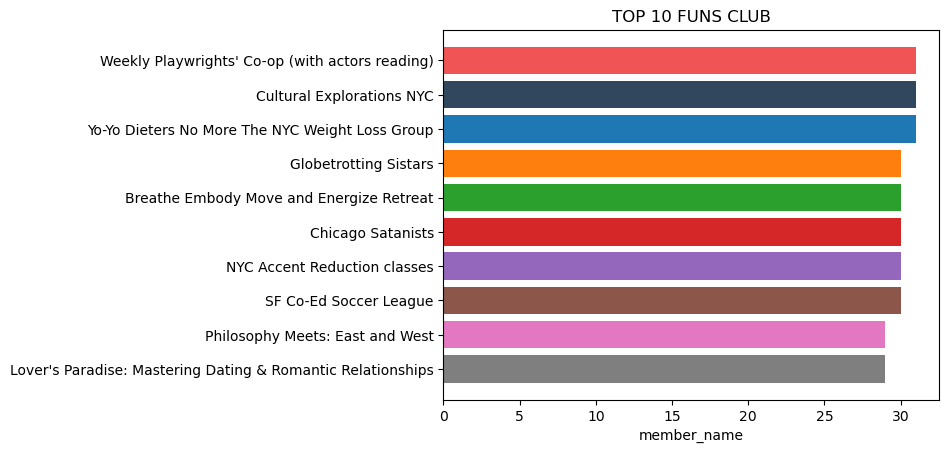

In [147]:
Viz_Bar(top10_clubs_name, 'fun_club_name' , 'member_name' , 'TOP 10 FUNS CLUB' , 'horizontal' ,False)

Поскольку в задачу исследования входит изучение агрегированных данных по категориям интересов, сделаем групировки по category_name

In [153]:
# подсчитаем общее количество членов клубов в разрезе категорий интересов - топ 10
top10_categories_by_number=members_12.groupby('category_name')['member_name'].count().sort_values(ascending=False).reset_index().head(10)
top10_categories_by_number

,category_name,member_name
0,Health & Wellbeing,14174
1,Language & Ethnic Identity,10788
2,New Age & Spirituality,9085
3,Outdoors & Adventure,8730
4,Sports & Recreation,8277
5,Food & Drink,8177
6,Education & Learning,6534
7,Music,6226
8,Arts & Culture,6092
9,Community & Environment,5846


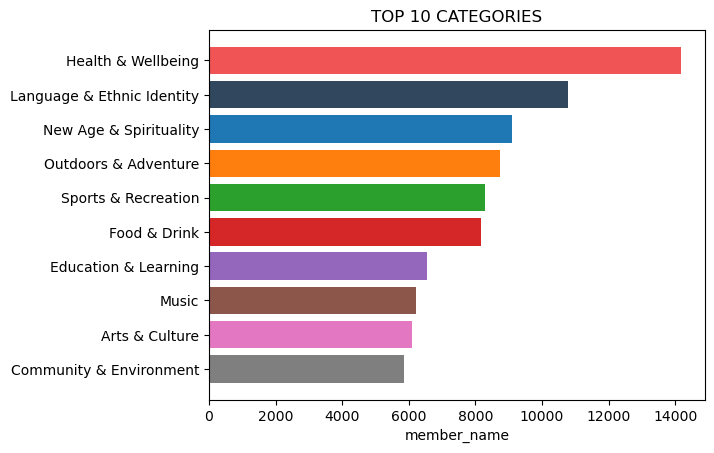

In [154]:
Viz_Bar(top10_categories_by_number, 'category_name' , 'member_name' , 'TOP 10 CATEGORIES' , 'horizontal' ,False)

In [150]:
# количественное распределение членов по всем category по всем штатам США с итогами Total
members_12.pivot_table(index='state_name', columns='category_name', \
                           values='member_name', aggfunc='count', fill_value=0,\
                           margins=True, margins_name='Total')

category_name,Arts & Culture,Book Clubs,Cars & Motorcycles,Community & Environment,Dancing,Education & Learning,Fitness,Food & Drink,Games,Health & Wellbeing,Hobbies & Crafts,Language & Ethnic Identity,Lifestyle,Movies & Film,Music,New Age & Spirituality,Outdoors & Adventure,Paranormal,Parents & Family,Photography,Religion & Beliefs,Sci-Fi & Fantasy,Singles,Sports & Recreation,Support,Writing,Total
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,112,48,17,129,65,119,114,168,97,305,43,212,40,66,113,172,157,8,88,40,89,23,44,134,93,44,2540
Alaska,26,14,2,37,12,36,32,33,27,61,12,52,6,20,33,43,40,3,19,17,23,4,12,37,26,17,644
Arizona,68,27,4,65,24,90,63,69,57,149,12,121,20,51,79,98,79,3,44,42,40,15,25,82,39,38,1404
Arkansas,86,35,15,89,45,79,69,116,81,193,28,154,25,48,98,139,120,3,68,34,38,18,39,126,52,34,1832
California,334,155,56,338,207,361,273,472,232,774,116,594,103,201,323,492,486,20,248,169,221,46,179,451,278,155,7284
Colorado,108,46,19,108,54,89,86,117,71,226,29,172,23,59,95,116,130,1,63,53,71,16,37,119,72,38,2018
Connecticut,47,23,8,54,32,55,39,67,40,144,20,85,20,34,67,70,70,1,43,31,34,8,24,81,33,20,1150
Delaware,15,6,4,18,9,17,20,21,10,40,8,29,6,6,20,21,24,2,10,7,12,6,11,31,10,7,370
District of Columbia,1,0,0,3,0,2,0,2,0,0,0,0,0,2,1,1,1,0,1,0,0,0,1,3,0,0,18


In [151]:
# добавим в распределение фактор пола "Sex"
members_12.pivot_table(index=['sex','state_name'], columns='category_name', \
                       values='member_name', aggfunc='count', fill_value=0,\
                       margins=True, margins_name='Total')

category_name        Arts & Culture  Book Clubs  Cars & Motorcycles  \
sex   state_name                                                      
F     Alabama                    30           9                   4   
      Alaska                     11           5                   1   
      Arizona                    15          10                   2   
      Arkansas                   30          10                   4   
      California                107          60                  23   
...                             ...         ...                 ...   
N     Washington                 43          21                  12   
      West Virginia              24          10                   8   
      Wisconsin                  54          17                  11   
      Wyoming                     9           2                   1   
Total                          6092        2791                1019   

category_name        Community & Environment  Dancing  Education & Learning  \
sex   state_name                                                              
F     Alabama                             49       20                    43   
      Alaska                              12        5                    17   
      Arizona                             25        9                    29   
      Arkansas                            40       14                    22   
      California                         124       72                   109   
...                                      ...      ...                   ...   
N     Washington                          53       32                    49   
      West Virginia                       24       10                    24   
      Wisconsin                           48       31                    51   
      Wyoming                              5        3                    13   
Total                                   5846     3375                  6534   

category_name        Fitness  Food & Drink  Games  Health & Wellbeing  \
sex   state_name                                                        
F     Alabama             38            58     43                 103   
      Alaska               9             7      6                  27   
      Arizona             24            18     13                  45   
      Arkansas            19            36     26                  53   
      California          89           157     78                 247   
...                      ...           ...    ...                 ...   
N     Washington          36            63     27                 102   
      West Virginia       23            28     11                  54   
      Wisconsin           49            83     50                 117   
      Wyoming             10            20      5                  25   
Total                   5248          8177   4665               14174   

category_name        Hobbies & Crafts  Language & Ethnic Identity  Lifestyle  \
sex   state_name                                                               
F     Alabama                      13                          69         13   
      Alaska                        3                          17          4   
      Arizona                       5                          37          7   
      Arkansas                      7                          55         11   
      California                   40                         190         34   
...                               ...                         ...        ...   
N     Washington                   12                          85         11   
      West Virginia                 6                          43          6   
      Wisconsin                    13                          95         11   
      Wyoming                       1                          17          2   
Total                            2022                       10788       1688   

category_name        Movies & Film  Music  New Age & Spir

In [152]:
# создадим отдельный датасет для исследования
members_states_dist=members_12.pivot_table(index='state_name', columns='category_name', \
                           values='member_name', aggfunc='count', fill_value=0)
members_states_dist

category_name,Arts & Culture,Book Clubs,Cars & Motorcycles,Community & Environment,Dancing,Education & Learning,Fitness,Food & Drink,Games,Health & Wellbeing,Hobbies & Crafts,Language & Ethnic Identity,Lifestyle,Movies & Film,Music,New Age & Spirituality,Outdoors & Adventure,Paranormal,Parents & Family,Photography,Religion & Beliefs,Sci-Fi & Fantasy,Singles,Sports & Recreation,Support,Writing
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,112,48,17,129,65,119,114,168,97,305,43,212,40,66,113,172,157,8,88,40,89,23,44,134,93,44
Alaska,26,14,2,37,12,36,32,33,27,61,12,52,6,20,33,43,40,3,19,17,23,4,12,37,26,17
Arizona,68,27,4,65,24,90,63,69,57,149,12,121,20,51,79,98,79,3,44,42,40,15,25,82,39,38
Arkansas,86,35,15,89,45,79,69,116,81,193,28,154,25,48,98,139,120,3,68,34,38,18,39,126,52,34
California,334,155,56,338,207,361,273,472,232,774,116,594,103,201,323,492,486,20,248,169,221,46,179,451,278,155
Colorado,108,46,19,108,54,89,86,117,71,226,29,172,23,59,95,116,130,1,63,53,71,16,37,119,72,38
Connecticut,47,23,8,54,32,55,39,67,40,144,20,85,20,34,67,70,70,1,43,31,34,8,24,81,33,20
Delaware,15,6,4,18,9,17,20,21,10,40,8,29,6,6,20,21,24,2,10,7,12,6,11,31,10,7
District of Columbia,1,0,0,3,0,2,0,2,0,0,0,0,0,2,1,1,1,0,1,0,0,0,1,3,0,0


In [158]:
# число максимального количества участников "pers_number" по отдельным categories (без названия категории)
df1 = members_states_dist.max(axis=1).to_frame('pers_number').reset_index()
df1

C:\Users\azhest\AppData\Local\Temp\ipykernel_5496\407564251.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = members_states_dist.max(axis=1).to_frame('pers_number').reset_index()


,state_name,pers_number
0,Alabama,305
1,Alaska,61
2,Arizona,149
3,Arkansas,193
4,California,774
5,Colorado,226
6,Connecticut,144
7,Delaware,40
8,District of Columbia,3
9,Florida,579


In [156]:
# выбираем в каждой строке с именами штатов максимальное значение количества членов по category 
# и записываем название этой категории в новую колонку
best = [members_states_dist.columns[i].tolist() for i in members_states_dist.values == members_states_dist.max(axis=1)[:,None]]
members_states_dist['best_pos'] = best

C:\Users\azhest\AppData\Local\Temp\ipykernel_5496\3924995347.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  best = [members_states_dist.columns[i].tolist() for i in members_states_dist.values == members_states_dist.max(axis=1)[:,None]]


In [159]:
# список сategory с максимальным количеством участников
df2 = members_states_dist['best_pos'].reset_index()
df2

,state_name,best_pos
0,Alabama,[Health & Wellbeing]
1,Alaska,[Health & Wellbeing]
2,Arizona,[Health & Wellbeing]
3,Arkansas,[Health & Wellbeing]
4,California,[Health & Wellbeing]
5,Colorado,[Health & Wellbeing]
6,Connecticut,[Health & Wellbeing]
7,Delaware,[Health & Wellbeing]
8,District of Columbia,"[Community & Environment, Sports & Recreation]"
9,Florida,[Health & Wellbeing]


In [118]:
# сводная таблица топ-10 списка наиболее популярных групп category с указание количества членов с распределение по штатам США
top10_category_by_state = df2.merge(df1, on='state_name').sort_values(by='pers_number', ascending=False).head(10)
top10_category_by_state

,state_name,best_pos,pers_number
44,Texas,[Health & Wellbeing],967
4,California,[Health & Wellbeing],774
38,Pennsylvania,[Health & Wellbeing],736
32,New York,[Health & Wellbeing],728
13,Illinois,[Health & Wellbeing],618
9,Florida,[Health & Wellbeing],579
35,Ohio,[Health & Wellbeing],543
33,North Carolina,[Health & Wellbeing],432
22,Michigan,[Health & Wellbeing],410
25,Missouri,[Health & Wellbeing],395


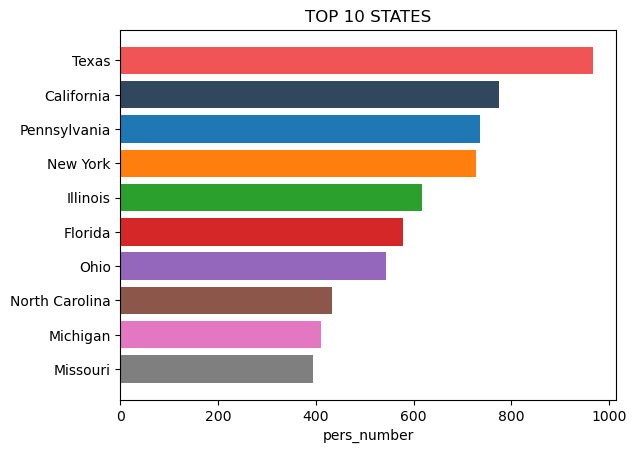

In [119]:
Viz_Bar(top10_category_by_state, 'state_name' , 'pers_number' , 'TOP 10 STATES' , 'horizontal' ,False)

Есть ещё один интересный параметр - ежемесячные ставки членских взносов monthly_fee_USD$	
Рассчитаем суммы внесенных взносов каждым членом за весь период членства

In [160]:
import datetime as dt
from datetime import date

In [161]:
# создадим колонку со значением кол-ва дней членства в клубе от даты вступления по сегодня
# только сразу преобразуем тип рассчетных данных из timedelta в integer 
for column in ['entry_date']:
    members_12['membership_duration_days']=(pd.to_datetime(date.today()) - members_12['entry_date']).dt.days.astype('int16')

In [162]:
members_12

,member_name,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,fun_club_name,category_id,monthly_fee_USD$,category_name,membership_duration_days
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7,Education & Learning,1803
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18,Fitness,1264
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19,Parents & Family,1729
3,Toni Baxter,1992-03-21,F,Emergency planning/management officer,3818,2017-07-18,1291778,Florence,Kentucky,31,San Francisco Dodgeball Meetup Group,32,1,Sports & Recreation,2113
4,Shaun Zuniga,1999-07-04,N,"Runner, broadcasting/film/video",4962,2017-11-18,26053931,Nickerson,Kansas,24,Passionate Concert Goers,21,9,Music,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130984,George Mcdaniel,1943-03-14,M,Comptroller,2393,2018-04-14,1222759,Oakhurst,California,80,RHYTHMflow Explorations,21,21,Music,1843
130985,Kevin Diaz DVM,1999-05-16,F,Customer service manager,4874,2018-12-27,2137821,Spring Lake Park,Minnesota,24,Aquatic Voyagers Scuba Club,23,18,Outdoors & Adventure,1586
130986,Latasha Alvarez MD,1953-07-07,N,Interpreter,2579,2018-09-20,23343110,Newton County,Missouri,70,Chicago Womens Soccer Meet up,32,5,Sports & Recreation,1684
130987,Hector Davidson,1945-05-05,N,Lexicographer,2890,2018-11-18,10982362,Houston,Alaska,78,Chicago Indonesian (Bahasa Indonesia) Language...,16,23,Language & Ethnic Identity,1625


In [163]:
# поскольку точность расчета неважна, посчитаем сумму уплаченных членских взносов
# каждым members с периодом каждые 30 дней с даты входа в клуб до сегодня. 
members_12['sum_fee_paid, USD$']=(members_12['membership_duration_days']/30*members_12['monthly_fee_USD$']).round(0)
members_12

,member_name,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,fun_club_name,category_id,monthly_fee_USD$,category_name,membership_duration_days,"sum_fee_paid, USD$"
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7,Education & Learning,1803,421.0
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18,Fitness,1264,758.0
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19,Parents & Family,1729,1095.0
3,Toni Baxter,1992-03-21,F,Emergency planning/management officer,3818,2017-07-18,1291778,Florence,Kentucky,31,San Francisco Dodgeball Meetup Group,32,1,Sports & Recreation,2113,70.0
4,Shaun Zuniga,1999-07-04,N,"Runner, broadcasting/film/video",4962,2017-11-18,26053931,Nickerson,Kansas,24,Passionate Concert Goers,21,9,Music,1990,597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130984,George Mcdaniel,1943-03-14,M,Comptroller,2393,2018-04-14,1222759,Oakhurst,California,80,RHYTHMflow Explorations,21,21,Music,1843,1290.0
130985,Kevin Diaz DVM,1999-05-16,F,Customer service manager,4874,2018-12-27,2137821,Spring Lake Park,Minnesota,24,Aquatic Voyagers Scuba Club,23,18,Outdoors & Adventure,1586,952.0
130986,Latasha Alvarez MD,1953-07-07,N,Interpreter,2579,2018-09-20,23343110,Newton County,Missouri,70,Chicago Womens Soccer Meet up,32,5,Sports & Recreation,1684,281.0
130987,Hector Davidson,1945-05-05,N,Lexicographer,2890,2018-11-18,10982362,Houston,Alaska,78,Chicago Indonesian (Bahasa Indonesia) Language...,16,23,Language & Ethnic Identity,1625,1246.0


In [164]:
# подсчитаем топ_10 categories по суммам уплаченных членских взносов
top10_categories_by_feepaid=members_12.groupby('category_name')['sum_fee_paid, USD$'].sum().sort_values(ascending=False).reset_index().head(10)
top10_categories_by_feepaid

,category_name,"sum_fee_paid, USD$"
0,Health & Wellbeing,9407939.0
1,Language & Ethnic Identity,7139519.0
2,Outdoors & Adventure,6062868.0
3,New Age & Spirituality,5896224.0
4,Food & Drink,5427798.0
5,Sports & Recreation,5400549.0
6,Education & Learning,4265785.0
7,Arts & Culture,4040463.0
8,Music,3938816.0
9,Community & Environment,3895028.0
